
<h4>The following dataset is used to classify the car acceptability into classes: unacceptable, acceptable, good and very good</h4>



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
%matplotlib inline

<h4>Importing the data and understanding statistics of data.</h4>

In [2]:
col_name = ['cost','maint','doors','persons','lug_boot','safety','car_acceptability']
#as column header is not present in dataset, give name to columns as per dataset/car.c45-names
df = pd.read_csv('C:\dataset\car.data', names=col_name, header=None)
print("dataset shape",df.shape)
df.head()

dataset shape (1728, 7)


,cost,maint,doors,persons,lug_boot,safety,car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
cost                 1728 non-null object
maint                1728 non-null object
doors                1728 non-null object
persons              1728 non-null object
lug_boot             1728 non-null object
safety               1728 non-null object
car_acceptability    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
#Check for null values
df.isnull().any()

cost                 False
maint                False
doors                False
persons              False
lug_boot             False
safety               False
car_acceptability    False
dtype: bool

In [5]:
#Check if any column has only single value, if any found remove that column
df.describe()

,cost,maint,doors,persons,lug_boot,safety,car_acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,5more,2,med,med,unacc
freq,432,432,432,576,576,576,1210


In [6]:
#Checking the missing values.
df.isna().sum(axis=0)

cost                 0
maint                0
doors                0
persons              0
lug_boot             0
safety               0
car_acceptability    0
dtype: int64

In [7]:
# check if values in each column is valid list of values mentioned in file dataset/car.c45.names
for cn in col_name:
    print(cn,"->",df[cn].unique())

cost -> ['vhigh' 'high' 'med' 'low']
maint -> ['vhigh' 'high' 'med' 'low']
doors -> ['2' '3' '4' '5more']
persons -> ['2' '4' 'more']
lug_boot -> ['small' 'med' 'big']
safety -> ['low' 'med' 'high']
car_acceptability -> ['unacc' 'acc' 'vgood' 'good']


<h4>Stacked bar graph to show distribution against car_acceptability</h4>
By looking at the graph we can say that if no_of_person is 2 or safety is low then car is unacceptable.
There is no single feature/attribute which contributes for car acceptability. 

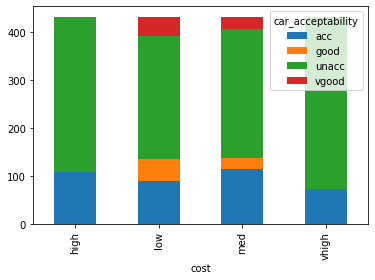

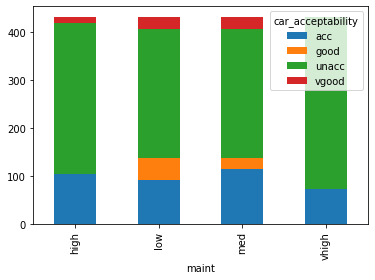

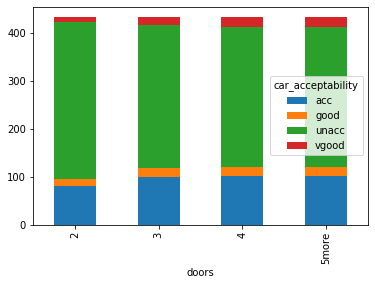

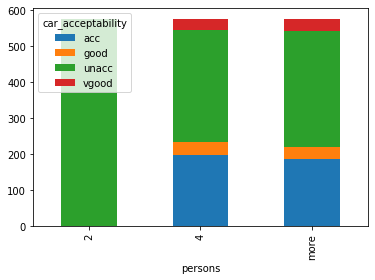

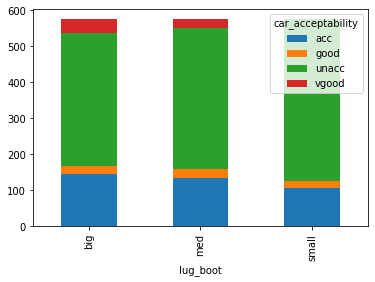

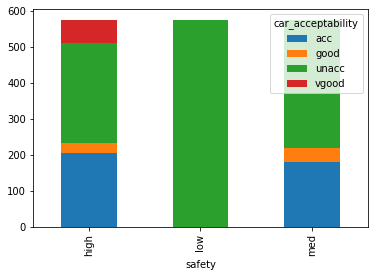

In [8]:
for cn in col_name:
    if cn != 'car_acceptability':
        df.groupby([cn, 'car_acceptability']).size().unstack().plot(kind='bar', stacked=True)

convert catagorical value to numerical


In [9]:
cleanup_nums = {
    "cost": {"low": 1, "med": 2, "high": 3, "vhigh": 4},
    "maint": {"low": 1, "med": 2, "high": 3, "vhigh": 4},
    "doors": {"5more": 5},
    "persons": {"more": 5},
    "lug_boot": {"small": 1, "med": 2, "big": 3},
    "safety": {"low": 1, "med": 2, "high": 3},
    "car_acceptability": {"unacc": 1, "acc": 2, "vgood": 3, "good": 4},
}
desicion_col=df['car_acceptability']
df.replace(cleanup_nums, inplace=True)
df["doors"] = df["doors"].astype('int64')
df["persons"] = df["persons"].astype('int64')
print(df.dtypes)
df.head()

cost                 int64
maint                int64
doors                int64
persons              int64
lug_boot             int64
safety               int64
car_acceptability    int64
dtype: object


,cost,maint,doors,persons,lug_boot,safety,car_acceptability
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [10]:
df.corr()

,cost,maint,doors,persons,lug_boot,safety,car_acceptability
cost,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.286532
maint,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.254656
doors,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.056475
persons,0.000000,0.000000,0.000000,1.000000e+00,2.523651e-19,0.000000,0.369802
lug_boot,0.000000,0.000000,0.000000,2.523651e-19,1.000000e+00,0.000000,0.121453
safety,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.402313
car_acceptability,-0.286532,-0.254656,0.056475,3.698023e-01,1.214529e-01,0.402313,1.000000


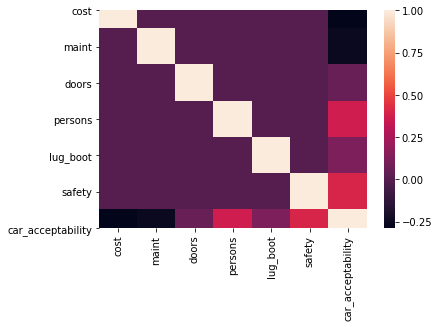

In [11]:
sns.heatmap(df.corr())

In [12]:
#Feature scaling 
#Standardize features by removing the mean(=0) and scaling to unit variation
desicion_col=df['car_acceptability']
mean = df.mean()
std = df.std()
df = (df - mean)/std
df.head()

,cost,maint,doors,persons,lug_boot,safety,car_acceptability
0,1.341253,1.341253,-1.341253,-1.335919,-1.22439,-1.22439,-0.558421
1,1.341253,1.341253,-1.341253,-1.335919,-1.22439,0.00000,-0.558421
2,1.341253,1.341253,-1.341253,-1.335919,-1.22439,1.22439,-0.558421
3,1.341253,1.341253,-1.341253,-1.335919,0.00000,-1.22439,-0.558421
4,1.341253,1.341253,-1.341253,-1.335919,0.00000,0.00000,-0.558421


In [13]:
#determining the predictors/features(X) and the response/class (y)
predictors = list(df.columns.values)
predictors.remove("car_acceptability")
X = df[predictors]
y = desicion_col
X.head()

,cost,maint,doors,persons,lug_boot,safety
0,1.341253,1.341253,-1.341253,-1.335919,-1.22439,-1.22439
1,1.341253,1.341253,-1.341253,-1.335919,-1.22439,0.00000
2,1.341253,1.341253,-1.341253,-1.335919,-1.22439,1.22439
3,1.341253,1.341253,-1.341253,-1.335919,0.00000,-1.22439
4,1.341253,1.341253,-1.341253,-1.335919,0.00000,0.00000


In [14]:
#splitting the dataset into training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0) 

In [15]:
#Fitting Logistic Regression to training set with Perform 10-fold cross validation
from sklearn.linear_model import LogisticRegressionCV
classifier = LogisticRegressionCV(cv=10, random_state=0)
classifier.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [16]:
#Predicting the Test set result
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
y_pred

0.7893518518518519


array([1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[292,   4,   0,   0],
       [ 61,  34,   4,   0],
       [  0,   1,  15,   0],
       [  4,  14,   3,   0]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.99      0.89       296
           2       0.64      0.34      0.45        99
           3       0.68      0.94      0.79        16
           4       0.00      0.00      0.00        21

    accuracy                           0.79       432
   macro avg       0.54      0.57      0.53       432
weighted avg       0.73      0.79      0.74       432



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
#Predict and display the class label of a car with following attributes : 
#buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med].
new_y_test = ['vhigh','low',4,'more','small','med',0]
#Convert catagorical value to numerical
i = 0
for key, val in cleanup_nums.items():
    if key != "car_acceptability" and new_y_test[i] in val:
        new_y_test[i] = val[new_y_test[i]]
    i += 1

#apply z score that we did for the model
print(new_y_test)
new_y_test = (new_y_test - mean)/std
new_y_test

[4, 1, 4, 5, 1, 2, 0]


cost                 1.341253
maint               -1.341253
doors                0.447084
persons              1.068736
lug_boot            -1.224390
safety               0.000000
car_acceptability   -1.896773
dtype: float64

In [20]:
#Do the prediction
del new_y_test['car_acceptability']
new_y_pred = classifier.predict([new_y_test])
print("class is :- ",new_y_pred[0])
for key, value in cleanup_nums['car_acceptability'].items():
    if value == new_y_pred[0]: 
        print("class is :- ", key)
        break

class is :-  1
class is :-  unacc
